In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as pl
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("D:/Data/cetpa_ml/logistic case study life survival prediction.csv")
data.head()

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,211.3375,S
1,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,151.5500,S
2,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,151.5500,S
3,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,151.5500,S
4,1,1,"Anderson, Mr. Harry",male,48.0,0,0,26.5500,S


In [3]:
data=data.drop(['name'],axis=1)
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0,0,0,211.3375,S
1,1,0,female,2.0,1,2,151.5500,S
2,1,0,male,30.0,1,2,151.5500,S
3,1,0,female,25.0,1,2,151.5500,S
4,1,1,male,48.0,0,0,26.5500,S


In [6]:
gender=pd.get_dummies(data['sex'],drop_first=True)
gender.head()

,male
0,0
1,0
2,1
3,0
4,1


In [7]:
Embarked=pd.get_dummies(data['embarked'],drop_first=True)
Embarked.head()

,Q,S
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [8]:
data=pd.concat((data,Embarked,gender),axis=1)
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,Q,S,male
0,1,1,female,29.0,0,0,211.3375,S,0,1,0
1,1,0,female,2.0,1,2,151.5500,S,0,1,0
2,1,0,male,30.0,1,2,151.5500,S,0,1,1
3,1,0,female,25.0,1,2,151.5500,S,0,1,0
4,1,1,male,48.0,0,0,26.5500,S,0,1,1


In [9]:
data=data.drop(['sex','embarked'],axis=1)
data.head()

,pclass,survived,age,sibsp,parch,fare,Q,S,male
0,1,1,29.0,0,0,211.3375,0,1,0
1,1,0,2.0,1,2,151.5500,0,1,0
2,1,0,30.0,1,2,151.5500,0,1,1
3,1,0,25.0,1,2,151.5500,0,1,0
4,1,1,48.0,0,0,26.5500,0,1,1


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

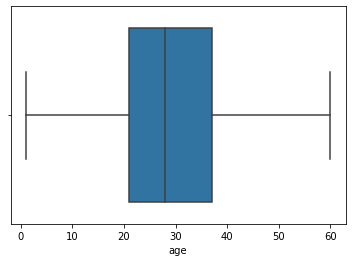

In [10]:
sns.boxplot(data['age'])

In [11]:
data.describe()

,pclass,survived,age,sibsp,parch,fare,Q,S,male
count,1257.000000,1257.000000,996.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000
mean,2.310263,0.382657,29.070783,0.501989,0.377884,32.720896,0.094670,0.701671,0.640414
std,0.831791,0.486229,12.819750,1.056616,0.863035,51.127788,0.292875,0.457707,0.480070
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.400000,0.000000,1.000000,1.000000
75%,3.000000,1.000000,37.000000,1.000000,0.000000,31.000000,0.000000,1.000000,1.000000
max,3.000000,1.000000,60.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1257 non-null   int64  
 1   survived  1257 non-null   int64  
 2   age       996 non-null    float64
 3   sibsp     1257 non-null   int64  
 4   parch     1257 non-null   int64  
 5   fare      1257 non-null   float64
 6   Q         1257 non-null   uint8  
 7   S         1257 non-null   uint8  
 8   male      1257 non-null   uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 62.7 KB


In [13]:
data.isnull().sum()

pclass        0
survived      0
age         261
sibsp         0
parch         0
fare          0
Q             0
S             0
male          0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

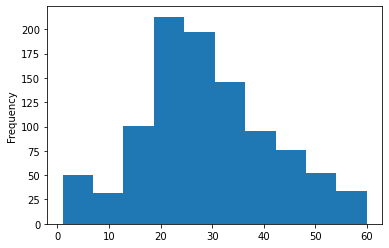

In [14]:
data['age'].plot.hist()

In [15]:
data['age'].fillna(data['age'].mean(),inplace=True)

In [16]:
data.isnull().sum()

pclass      0
survived    0
age         0
sibsp       0
parch       0
fare        0
Q           0
S           0
male        0
dtype: int64

In [17]:
x=data.drop(['survived'],axis=1)
y=data['survived']

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
clf=LogisticRegression().fit(x_train,y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
pre_y=clf.predict(x_test)

In [22]:
pre_y

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pre_y)

array([[217,  41],
       [ 51, 106]], dtype=int64)

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
acc = accuracy_score(y_test, pre_y)

In [25]:
print ('acc', acc)

acc 0.7783132530120482


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pre_y))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       258
           1       0.72      0.68      0.70       157

    accuracy                           0.78       415
   macro avg       0.77      0.76      0.76       415
weighted avg       0.78      0.78      0.78       415



In [30]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, pre_y)

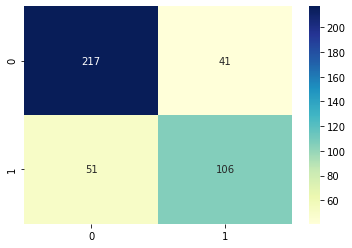

In [28]:
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,
                fmt='g')

Text(0.5, 0, 'Predicted label')

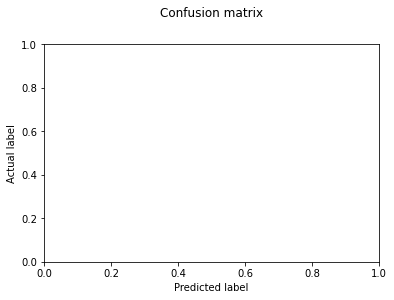

In [29]:
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')